# Student's Marks Prediction - SVR

* Libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

* Importing Dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')

In [4]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


# Exploratory Data Analysis

* Statistical Analysis

In [5]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


* General Information 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


* Checking Number of Null Values

In [8]:
df.isnull().sum()

Hours of Study    0
Marks             0
dtype: int64

* Plotting the Correlation

Text(0.5, 1.0, 'Hours of Study v/s Marks Graph')

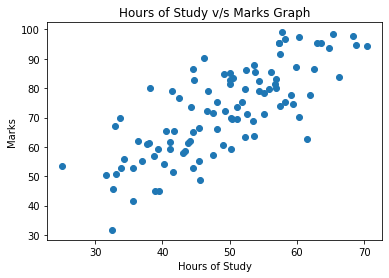

In [12]:
plt.scatter(df['Hours of Study'],df.Marks)
plt.xlabel('Hours of Study')
plt.ylabel("Marks")
plt.title('Hours of Study v/s Marks Graph')

As the Hours of Study increases, the marks also increases

* Checking the Correlation

In [92]:
df.corr()

,Hours of Study,Marks
Hours of Study,1.00000,0.76477
Marks,0.76477,1.00000


* Plotting the Heatmap

<AxesSubplot:>

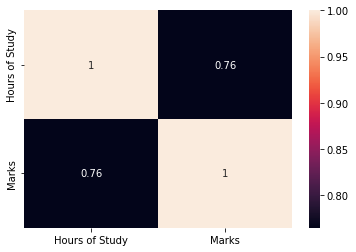

In [17]:
sns.heatmap(df.corr(),annot=True)

* Checking the Line Plot

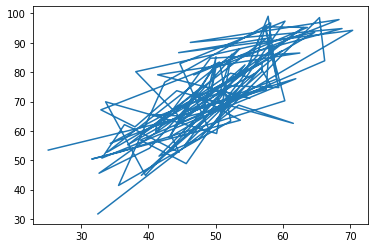

In [18]:
plt.plot(df['Hours of Study'],df.Marks)

# Feature Scaling

* Variablizing the Data

In [57]:
# x=np.array(df['Hours of Study'])
# y=np.array(df.Marks)

x=np.array(df.iloc[:,-2])
y=np.array(df.iloc[:,-1])

In [24]:
df.iloc[0]

Hours of Study    32.502345
Marks             31.707006
Name: 0, dtype: float64

* Creating the Variable for the StandardScaler

In [59]:
stanScale=StandardScaler()

* Transforming the Data into the StandardScalar

In [60]:
x=stanScale.fit_transform(x.reshape(-1,1))
y=stanScale.fit_transform(y.reshape(-1,1))

* Splitting the data

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

* Selecting the Model

In [66]:
model=SVR(kernel='rbf')

* Fitting the Model

In [67]:
model.fit(x_train,y_train)

C:\Users\karan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

* Predicting the Result

In [69]:
y_pred=model.predict(x_test)

In [70]:
y_pred

array([-0.76947139,  0.62495329, -0.36605346, -1.26283815,  0.57381597,
       -0.1185472 , -0.75664008, -0.40417142, -0.99623181,  0.95262628,
        1.07387222,  0.35030893, -0.56328734, -0.52093818,  0.07543078,
        1.22551728,  1.33758452,  0.67596748, -0.56967027, -0.64786557])

* ReTransforming the Scaled values to the original

In [72]:
y_pred=stanScale.inverse_transform(y_pred.reshape(-1,1))

In [74]:
y_test=stanScale.inverse_transform(y_test.reshape(-1,1))

* Plotted the Actual Marks v/s Predicted Marks Graph

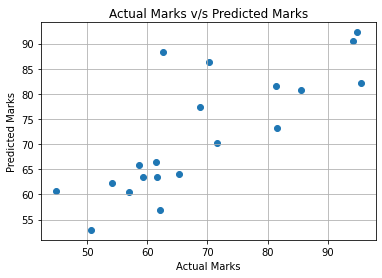

In [77]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual Marks v/s Predicted Marks")
plt.grid()

# Performance Analysis

* Checking the Accuracy

In [78]:
model.score(x_test,y_test)

-22.099949752331796

* r Squared Test

In [81]:
r2_score(y_test,y_pred)

0.5943071038285547

* Mean Squared Error

In [82]:
mean_squared_error(y_test,y_pred)

87.23306900235274

* Mean Absolute Error

In [83]:
mean_absolute_error(y_test,y_pred)

6.933427431006029

# Without Feature Scaling

* Variablizing the data

In [85]:
a=np.array(df.iloc[:,-2])
b=np.array(df.iloc[:,-1])

* Splitting the Data

In [86]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=10)

* Selecting the Model

In [89]:
model2=SVR(kernel='rbf')

* Fitting the Model

In [90]:
model2.fit(x_train,y_train)

C:\Users\karan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

* Checking the Accuracy of the model

In [91]:
model2.score(x_test,y_test)

-22.099949752331796